## DO NOT ALTER THE CODE FROM HERE THROUGH PLOTTING

In [82]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [83]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [84]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df.dtypes

OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                       float64
incident_type_description            object
platoon                              object
station                             float64
Longitude                            object
Latitude                             object
Year                                float64
Date                                 object
dtype: object

In [85]:
# The total number of rows with the years 2008-2018 and incident type not null
len(df['dispatch_date_time'].unique())

154071

In [86]:
years = df.groupby('Year')['OBJECTID'].count()
years

Year
2008.0    13705
2009.0    13028
2010.0    13531
2011.0    13893
2012.0    13607
2013.0    13943
2014.0    14415
2015.0    15130
2016.0    15746
2017.0    18151
2018.0    14654
Name: OBJECTID, dtype: int64

In [87]:
# Create data frame to hold Fire Incidents
incident = years
incident_df = pd.DataFrame({'Year':incident.index, 'Incident Count':incident.values})
incident_df

,Year,Incident Count
0,2008.0,13705
1,2009.0,13028
2,2010.0,13531
3,2011.0,13893
4,2012.0,13607
5,2013.0,13943
6,2014.0,14415
7,2015.0,15130
8,2016.0,15746
9,2017.0,18151


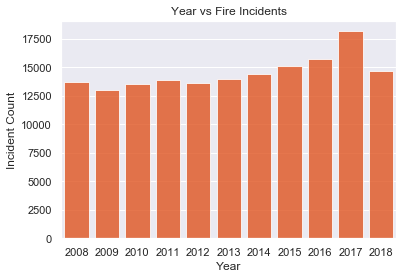

In [88]:
#Generate seaborn bar plot - Year vs Fire Incidents
incident_barplot = sbn.barplot(x=incident_df["Year"].astype(np.int64), y=incident_df["Incident Count"], data=incident_df, color='orangered', alpha=0.8)
inc_barplot.set(ylabel='Incident Count')
plt.title('Year vs Fire Incidents')
plt.savefig('graphics/bar_year_vs_fireincidents.png', bbox_inches='tight')
plt.show()

In [89]:
#Scaled fire incidents to hundreds
incident_scaled100 = incident_df['Incident Count']/100
incident_df['Incident Count/100'] = incident_scaled100
incident_df

,Year,Incident Count,Incident Count/100
0,2008.0,13705,137.05
1,2009.0,13028,130.28
2,2010.0,13531,135.31
3,2011.0,13893,138.93
4,2012.0,13607,136.07
5,2013.0,13943,139.43
6,2014.0,14415,144.15
7,2015.0,15130,151.30
8,2016.0,15746,157.46
9,2017.0,18151,181.51


In [90]:
#Save Wake County Population Data to csv file
incident_df.to_csv('output/fireincident.csv', encoding='utf-8', index=False)

In [91]:
# Read the Wake County Population and Fire Incidents CSVs
wakecountypop_to_load = pd.read_csv('output/wakecountypopulation.csv')
firecincident_to_load = pd.read_csv('output/fireincident.csv')

In [92]:
wakecountypop_to_load

,Year,Population
0,2009,828759.0
1,2010,850546.0
2,2011,879658.0
3,2012,905573.0
4,2013,929214.0
5,2014,952513.0
6,2015,976019.0
7,2016,998576.0
8,2017,1023811.0
9,2018,1048192.5


In [93]:
# Combine the data into a single dataset
wakecountypop_incident_df = pd.merge(wakecountypop_to_load, firecincident_to_load, how='left', on='Year')

# Display the data table for preview
wakecountypop_incident_df
wakecountypop_incident_df.dropna()
scaled1k_pop = wakecountypop_incident_df['Population']/1000
wakecountypop_incident_df['Population/1000'] = scaled1k_pop
wakecountypop_incident_df.dropna()
yr_scaled = incident_df['Year'].astype(np.int64)

#Create data frame to hold city weather data
column_names = ('Year', 'Population/1000', 'Incident Count/100')
wakecountypop_incident_scaled = pd.DataFrame(columns = column_names)
wakecountypop_incident_scaled['Population/1000'] = scaled1k_pop
wakecountypop_incident_scaled['Incident Count/100'] = incident_scaled100
wakecountypop_incident_scaled["Year"] = yr_scaled.astype(np.int64)
cleaned_wakecounty_scaled = wakecountypop_incident_scaled.dropna()
cleaned_wakecounty_scaled

,Year,Population/1000,Incident Count/100
0,2008.0,828.7590,137.05
1,2009.0,850.5460,130.28
2,2010.0,879.6580,135.31
3,2011.0,905.5730,138.93
4,2012.0,929.2140,136.07
5,2013.0,952.5130,139.43
6,2014.0,976.0190,144.15
7,2015.0,998.5760,151.30
8,2016.0,1023.8110,157.46
9,2017.0,1048.1925,181.51


In [94]:
#Save to CSV - wake county scaled data
cleaned_wakecounty_scaled.to_csv('output/cleaned_wakecounty_scaled.csv', encoding='utf-8', index=False)

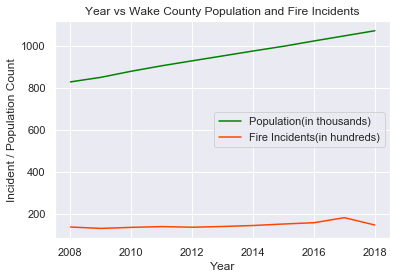

In [95]:
#Generate seaborn line plot - Year vs Wake County Population/Fire Incidents
sbn.set(style = 'darkgrid')
pop_plot = sbn.lineplot(x=cleaned_wakecounty_scaled["Year"], y=cleaned_wakecounty_scaled["Population/1000"], data=cleaned_wakecounty_scaled, label='Population(in thousands)', color='green')
inc_plot = sbn.lineplot(x=cleaned_wakecounty_scaled["Year"].astype(np.int64), y=cleaned_wakecounty_scaled["Incident Count/100"], data=cleaned_wakecounty_scaled, label='Fire Incidents(in hundreds)', color='orangered') 
inc_plot.set(ylabel='Incident / Population Count')
plt.title('Year vs Wake County Population and Fire Incidents')
plt.savefig('graphics/line_year_vs_wakecounty_pop_inc.png', bbox_inches='tight')
plt.show()

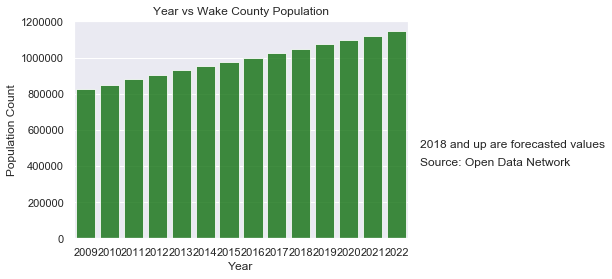

In [112]:
#Generate seaborn bar plot - Year vs Wake County Population
wakecountypopulation_barplot = sbn.barplot(x=wakecountypop_to_load["Year"].astype(np.int64), y=wakecountypop_to_load["Population"], data=wakecountypop_to_load, color='green', alpha=0.8)
plt.title('Year vs Wake County Population')
wakecountypopulation_barplot.set(ylabel='Population Count')
plt.text(14,500000, '2018 and up are forecasted values')
plt.text(14,400000, 'Source: Open Data Network')
plt.savefig('graphics/bar_year_vs_wakecounty_pop.png', bbox_inches='tight')
plt.show()

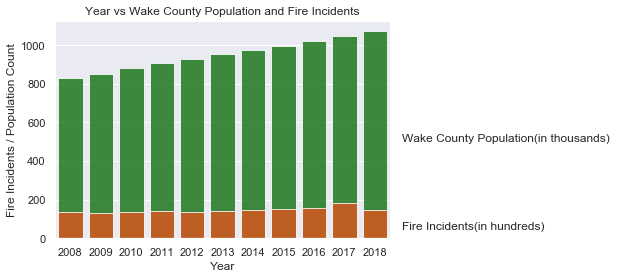

In [97]:
#Generate seaborn bar plot - Year vs Wake County Population/Fire Incidents
pop_barplot = sbn.barplot(x=cleaned_wakecounty_scaled["Year"].astype(np.int64), y=cleaned_wakecounty_scaled["Population/1000"], data=cleaned_wakecounty_scaled, color='green', alpha=0.8)
inc_barplot = sbn.barplot(x=cleaned_wakecounty_scaled["Year"].astype(np.int64), y=cleaned_wakecounty_scaled["Incident Count/100"], data=cleaned_wakecounty_scaled, color='orangered', alpha=0.8)
inc_barplot.set(ylabel='Fire Incidents / Population Count')
plt.title('Year vs Wake County Population and Fire Incidents')
plt.text(10.9,500, 'Wake County Population(in thousands)')
plt.text(10.9,45, 'Fire Incidents(in hundreds)')
plt.savefig('graphics/bar_year_vs_wakecounty_pop_inc.png', bbox_inches='tight')
plt.show()

In [98]:
# Calculating the time from dispatch to cleared in minutes and in seconds
df['Arr Time'] = (df['arrive_date_time'] - df['dispatch_date_time'])
df['Arr Time'] = pd.to_timedelta(df['Arr Time'])
df['Seconds'] = df['Arr Time'].dt.total_seconds()


In [99]:
df = df.loc[df['station']!=13.0]
len(df)

159801

## Start any plotting from here

In [100]:
# There appear to be some funky clearance times, possibly human error
outlier = df.loc[df['Arr Time']==df['Arr Time'].max()]
no_outliers = df[df['Arr Time'] <= df['Arr Time'].mean() + 3 * df['Arr Time'].std()]
len(no_outliers)

129701

In [101]:
raw_year = df.groupby(['Year']).OBJECTID.count()

In [102]:
years = no_outliers.groupby(['Year']).OBJECTID.count()

In [103]:
diff = raw_year - years
diff #<-- This represents the number of arrival times that were considered outliers per year

Year
2008.0    1823
2009.0    2106
2010.0    2353
2011.0    2541
2012.0    2630
2013.0    2872
2014.0    2892
2015.0    3074
2016.0    3188
2017.0    3732
2018.0    2889
Name: OBJECTID, dtype: int64

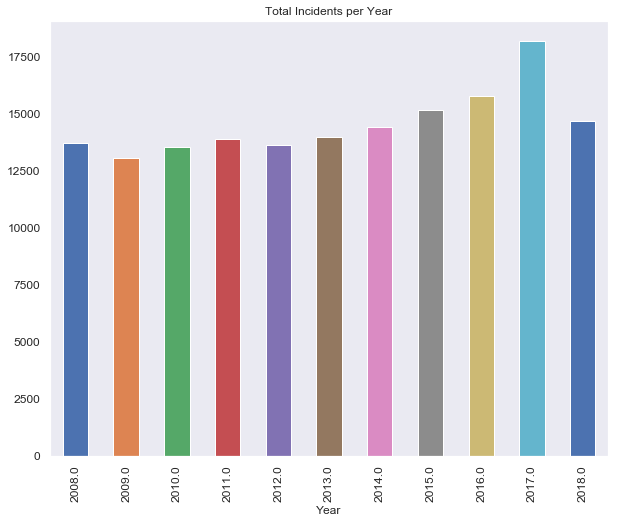

In [104]:
raw_year.plot(kind='bar', figsize=(10,8), use_index=True, title='Total Incidents per Year', grid=False,fontsize=12)
plt.savefig('./graphics/total_fi_year_withoutliers.png')

In [105]:
# ### Trying to get at what stations were in the dataset per year
# sl = no_outliers.groupby('station')['Year'].unique()
# # sl.sort()
# sl
# # It looks like station 0 is a mistake, stage 13 only has records from 2008 and not listed on Wake Co FD list
# # Station 29 came online in 2015

In [106]:
df['incident_type'].unique()

array([ 150.,  510.,  440.,  561.,  520.,  531.,  554.,  700.,  511.,
        500.,  611.,  111.,  100.,  444.,  735.,  422.,  445.,  743.,
        424.,  710.,  746.,  622.,  131.,  652.,  480.,  421.,  412.,
        551.,  736.,  741.,  651.,  461.,  151.,  600.,  143.,  251.,
        550.,  141.,  745.,  814.,  113.,  142.,  911.,  522.,  730.,
        740.,  733.,  463.,  813.,  140.,  900.,  744.,  112.,  553.,
        552.,  631.,  154.,  442.,  411.,  400.,  160.,  671.,  162.,
        118.,  441.,  711.,  713.,  420.,  443.,  413.,  152.,  621.,
        410.,  153.,  734.,  155.,  540.,  130.,  812.,  116.,  653.,
        715.,  800.,  200.,  170.,  240.,  121.,  731.,  221.,  714.,
        650.,  542.,  571.,  815.,  460.,  521.,  632.,  161.,  555.,
        423.,  220.,  114.,  641.,  451.,  132.,  138.,  210.,  223.,
        481.,  742.,  721.,  751.,  512.,  163.,  732.,  211.,  123.,
        134.,  120.,  164.,  482.,  173.,  137.,  672.,  541.,  115.,
        471.,  172.,

In [107]:
# Create bins to group incidents, but need to figure out how this works...

bins = [99, 200, 400, 500, 600, 700, 800, 900, 912]
labels = ["Fire", "Overpressure Rupture/Explosion (No Fire)", "Hazardous Condition (No Fire)", "Service Call", "Good Intent Call", "False Alarm and False Call", 
          "Severe Weather/Natural Disaster", "Special Incident Type"]
# pd.cut(no_outliers["station"], bins, labels=labels).head()
df['Incident'] = pd.cut(df["incident_type"], bins, labels=labels)
df.head(20)

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
0,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.5373,35.8916,2013.0,2013-10-19,00:05:00,300.0,Fire
1,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4.0,-78.6476,35.8782,2014.0,2014-02-14,00:03:00,180.0,Service Call
2,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1.0,-78.634,35.7654,2012.0,2012-04-29,00:01:00,60.0,Hazardous Condition (No Fire)
3,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18.0,-78.6914,35.8844,2012.0,2012-04-28,00:03:00,180.0,Service Call
4,474773,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28.0,-78.5166,35.8727,2014.0,2014-01-26,00:04:00,240.0,Service Call
5,474774,"250 E DAVIE ST RALEIGH, NC 27601",NaN,,2012-02-28 00:58:00,2012-02-28 01:13:00,2012-02-28 00:56:00,0,12-0005738,531.0,Smoke or odor removal,C,1.0,-78.6357,35.7754,2012.0,2012-02-28,00:02:00,120.0,Service Call
6,474775,"7013 CEDAR BEND CT RALEIGH, NC 27601",NaN,,2011-12-15 13:18:00,2011-12-15 13:29:00,2011-12-15 13:10:00,0,11-0036227,554.0,Assist invalid,A,18.0,-78.6724,35.8795,2011.0,2011-12-15,00:08:00,480.0,Service Call
7,474776,"3829 BROWNING PL RALEIGH, NC 27601",NaN,,2014-04-26 05:35:00,2014-04-26 05:43:00,2014-04-26 05:32:00,0,14-0012080,700.0,False alarm or false call Other,A,9.0,-78.6342,35.8309,2014.0,2014-04-26,00:03:00,180.0,Good Intent Call
8,474777,"5614 APALACHICULA DR RALEIGH, NC 27603",NaN,,2014-05-01 01:02:00,2014-05-01 01:18:00,2014-05-01 00:55:00,0,14-0012609,511.0,Lock-out,B,22.0,-78.5464,35.8876,2014.0,2014-05-01,00:07:00,420.0,Service Call
9,474778,"8431 BERKSHIRE VILLAGE CT RALEIGH, NC 27603",NaN,,2010-05-15 17:49:00,2010-05-15 17:59:00,2010-05-15 17:45:00,0,10-0013764,510.0,Person in distress Other,C,22.0,-78.5579,35.8869,2010.0,2010-05-15,00:04:00,240.0,Service Call


In [108]:
all_incidents = df.groupby('Incident')

In [109]:
# We can try to do a pie chart of the incidents or other type of a plot here...

# all_incidents.plot(kind='pie', y= ??, figsize=(10,8), title='Incidents Types per Year', fontsize=12)
# plt.savefig('./graphics/incident_types.png')

In [110]:
# station_groups = no_outliers.groupby(['Station Group','Year'])
# station_groups['OBJECTID'].count()